In [1]:
from reasoning import get_dataset
import numpy as np

df, target = get_dataset()

Features:  Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246) 

Target Columns:  Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object') 

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode'] 

Dataframe Shape:  (32153, 243)


Max Coor: 188
Min Coor: 66


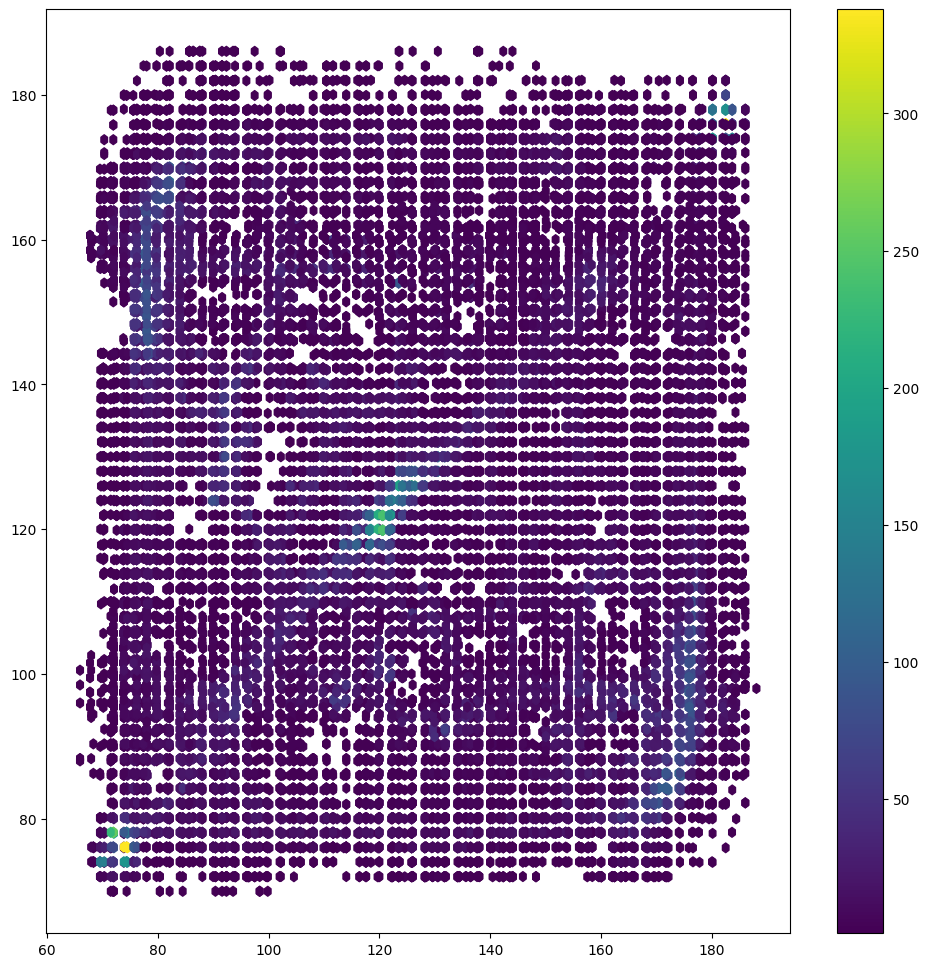

Number of Odd Coordinate: 0


In [2]:
import matplotlib.pyplot as plt

max_coor = []
min_coor = []

for i in range(5):
    max_coor.append(df[f"d{i+1}_x"].max())
    max_coor.append(df[f"d{i+1}_y"].max())
    max_coor.append(df[f"r{i+1}_x"].max())
    max_coor.append(df[f"r{i+1}_y"].max())
    min_coor.append(df[f"d{i+1}_x"].min())
    min_coor.append(df[f"d{i+1}_y"].min())
    min_coor.append(df[f"r{i+1}_x"].min())
    min_coor.append(df[f"r{i+1}_y"].min())

print("Max Coor:",np.max(max_coor))
print("Min Coor:",np.min(min_coor))

df_early = df#df.query("game_time < 31 and game_time >19")

plt.figure(figsize=(12,12))
plt.hexbin(df_early["d1_x"],df_early["d1_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d2_x"],df_early["d2_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d3_x"],df_early["d3_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d4_x"],df_early["d4_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["d5_x"],df_early["d5_y"],mincnt=1)#,c="blue")
plt.hexbin(df_early["r1_x"],df_early["r1_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r2_x"],df_early["r2_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r3_x"],df_early["r3_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r4_x"],df_early["r4_y"],mincnt=1)#,c="red")
plt.hexbin(df_early["r5_x"],df_early["r5_y"],mincnt=1)#,c="red")
plt.colorbar()
plt.show()

print("Number of Odd Coordinate:",np.sum([(df["d3_y"] % 2) == 1]))

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id']
Numbers of Heros:  115


array([[<Axes: title={'center': 'r1_hero_id'}>,
        <Axes: title={'center': 'r2_hero_id'}>,
        <Axes: title={'center': 'r3_hero_id'}>],
       [<Axes: title={'center': 'r4_hero_id'}>,
        <Axes: title={'center': 'r5_hero_id'}>,
        <Axes: title={'center': 'd1_hero_id'}>],
       [<Axes: title={'center': 'd2_hero_id'}>,
        <Axes: title={'center': 'd3_hero_id'}>,
        <Axes: title={'center': 'd4_hero_id'}>],
       [<Axes: title={'center': 'd5_hero_id'}>, <Axes: >, <Axes: >]],
      dtype=object)

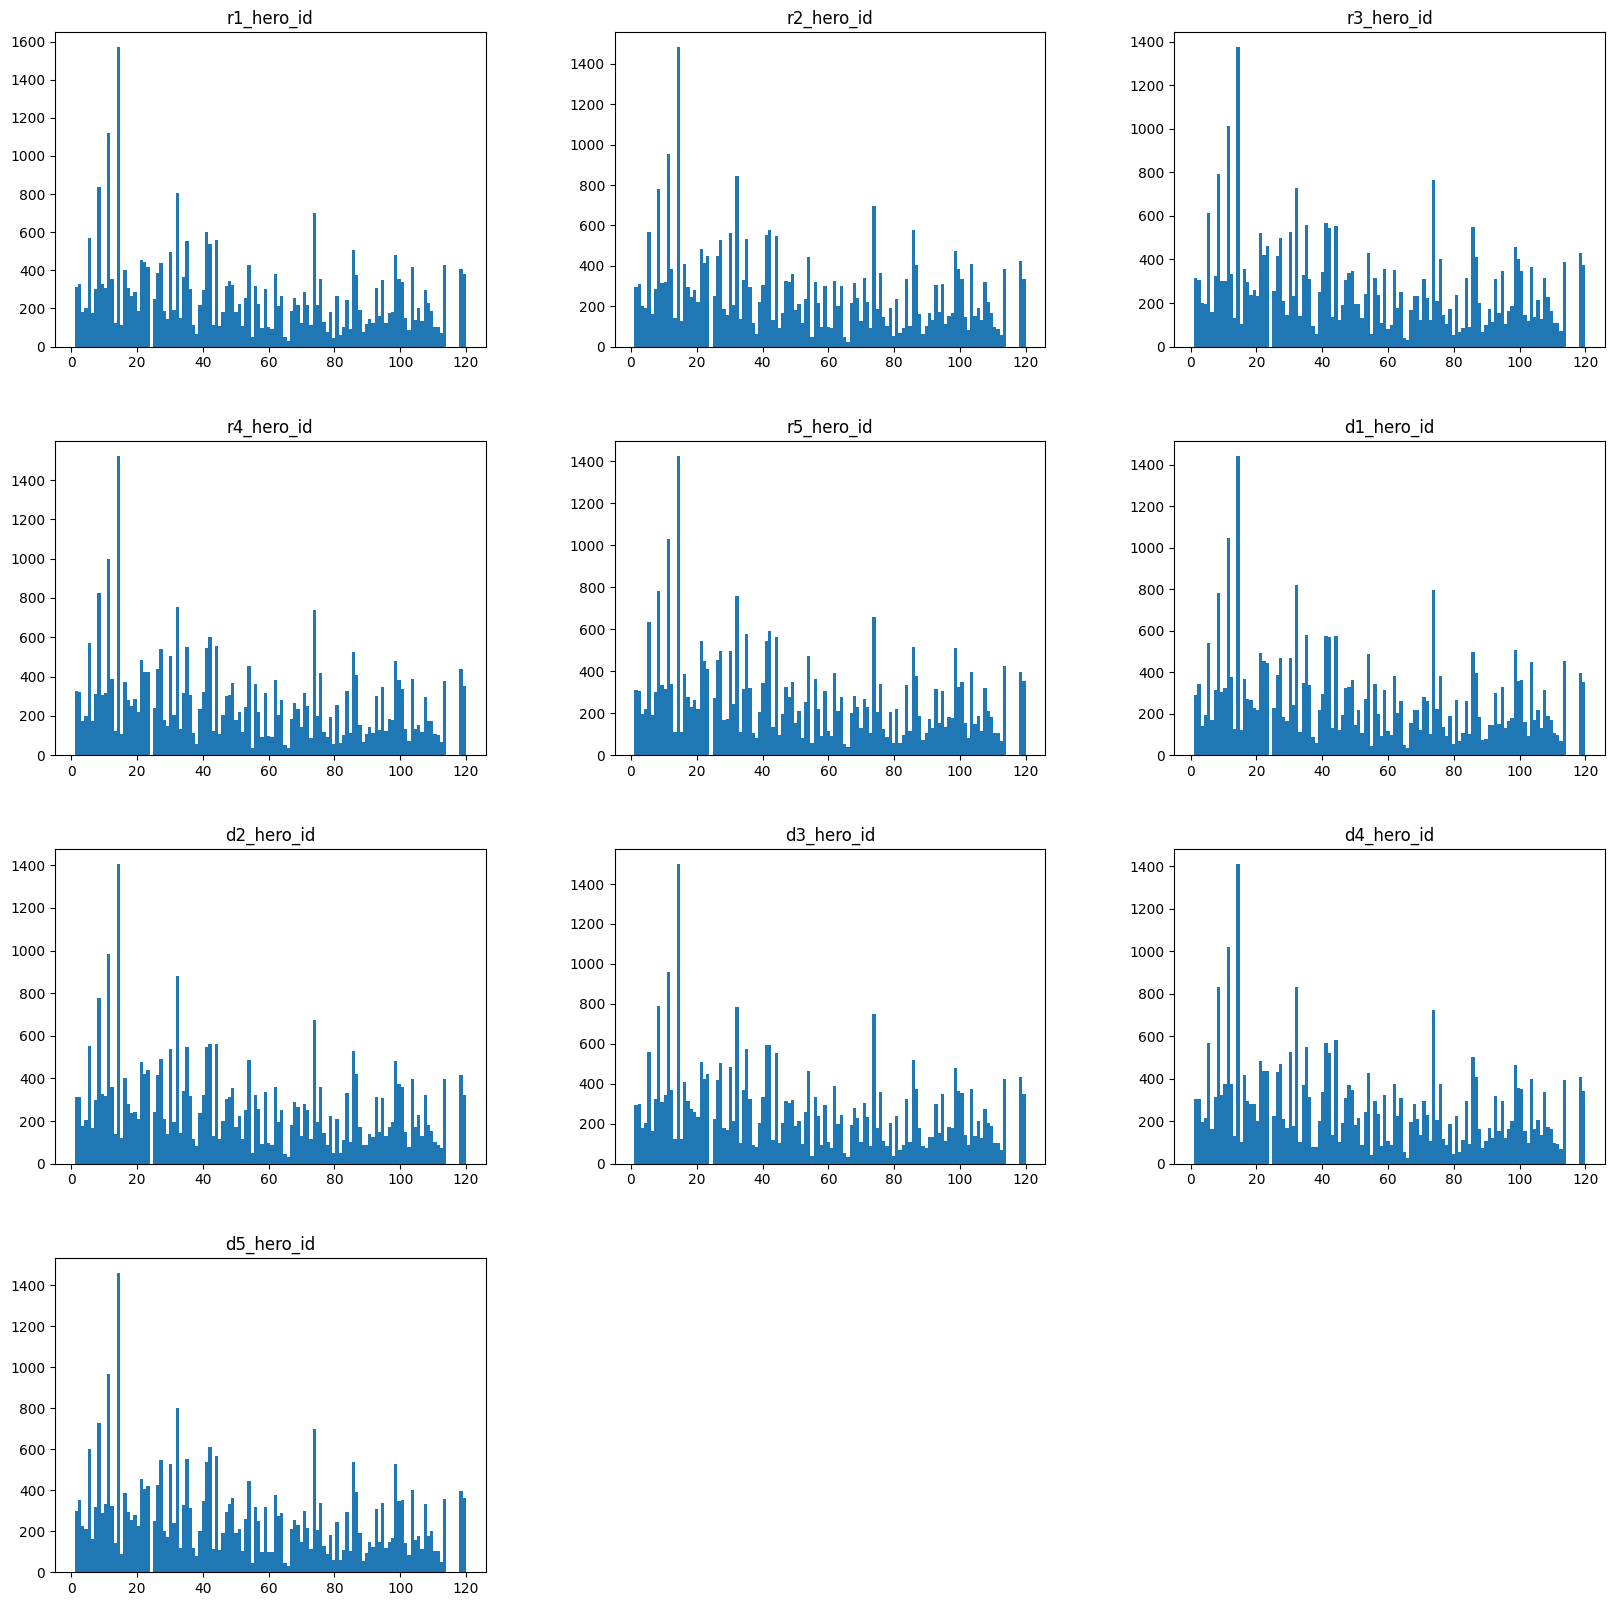

In [ ]:
from reasoning import get_hero_id_labels
hero_id_labels = get_hero_id_labels(df)

df[hero_id_labels].hist(
    figsize=(20,20),
    bins=120,
    grid=False
)